In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
##Reading both the data files
inp = pd.read_csv(r"C:\Users\vskee\Downloads\application_data.csv")
inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
inp0 = pd.read_csv(r"C:\Users\vskee\Downloads\previous_application.csv")
inp0.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# To view the data types of all the columns 
inp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
#To know the number of columns and rows
inp.shape

(307511, 122)

In [7]:
###checking other data set

In [6]:
inp.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
inp0.shape

(1670214, 37)

In [9]:
inp0.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Checking for duplicated data

In [10]:
inp.duplicated().sum()

0

In [11]:
##

In [12]:
inp0.duplicated().sum()

0

Observations
* Indicates that there are no duplicated values found

In [13]:
#checking for missing values more than 30%
round(100*(inp.isnull().sum() / len(inp)), 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [14]:
#dropping all the columns which has missing value more than 30%
inp1 = inp.drop(inp.columns[inp.isnull().mean() >= 0.30], axis = 1)
print('The shape of the original dataset ',inp.shape)
print('The shape of the dataset after removing the missing values',inp1.shape)

The shape of the original dataset  (307511, 122)
The shape of the dataset after removing the missing values (307511, 72)


In [15]:
# percentage of missing values after dropping columns which had more than 30% missing values
round(100*(inp1.isnull().sum() / len(inp1)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [16]:
## Let us look at the column NAME_TYPE_SUITE (Who accompanied client when applying for the previous application)
inp1.NAME_TYPE_SUITE.isna().sum()

1292

In [17]:
inp1.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [18]:
#Checking for NaN in NAME_TYPE_SUITE
inp1[inp1.NAME_TYPE_SUITE.isna()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1,1,0,1,0,0,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,NaN,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,1,1,0,1,0,0,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,0.756676,0.544235,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,-2179,1,1,0,1,1,0,3.0,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.685813,0.528093,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,-4371,1,1,1,1,1,0,2.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.492076,0.178760,2.0,0.0,2.0,0.0,-326.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0


In [19]:
##

In [20]:
inp1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Obsevation:
- Looks like these data are MCAR type 
- Reason being there could be no one accompanied by the client while applying for the loan
- We can impute these NaN by 'Unaccompanied'

In [21]:
#Filling Nan by 'Unaccompanied'
inp1.NAME_TYPE_SUITE.fillna(value = 'Unaccompanied', inplace = True)

In [22]:
#Checking for NaN in NAME_TYPE_SUITE
inp1.NAME_TYPE_SUITE.isna().sum()

0

In [23]:
## Next is the CNT_FAM_MEMBERS column

In [24]:
inp1[inp1.CNT_FAM_MEMBERS.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,NaN,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
inp1.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

MCAR type missing value which can be imputed by mode method (i.e) by  2 persons which is the maximum


In [26]:
##Imputing the missing values by mode method
inp1.CNT_FAM_MEMBERS.fillna(value=2, inplace = True)

In [27]:
## Cross-checking whether the missing values is replaced by 2
inp1.CNT_FAM_MEMBERS.isna().sum()

0

In [28]:
##Checking for missing values between 0 and 13%
inp1[inp1.columns[(inp1.isnull().sum() > 0) & (inp1.isnull().sum() < (len(inp)*0.13))]].isna().sum()

AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
EXT_SOURCE_2                 660
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

In [29]:
inp1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [30]:
inp1[inp1.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.297087,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.019689,-13902,-3540,-168.0,-4250,1,1,0,1,0,1,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Self-employed,0.510934,0.5

In [31]:
inp1.AMT_ANNUITY.isna().sum()/len(inp)*100

0.003902299429939092

Observation
- Since the missing percentage is very small we can drop the rows

In [32]:
##Before dropping the shape of the dataset
inp1.shape

(307511, 72)

In [33]:
inp1 = inp1[~(inp1.AMT_ANNUITY.isna())]

In [34]:
##After dropping the shape of the dataset
inp1.shape

(307499, 72)

Converting DAYS_BIRTH (Negative values) into age format

In [35]:
inp1.DAYS_BIRTH = inp1.DAYS_BIRTH//-365

In [36]:
inp1.rename(columns= {'DAYS_BIRTH':'AGE'}, inplace = True)

In [37]:
inp1['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307499, dtype: int64

In [38]:
##DAYS_EMPLOYED checking for negative values
len(inp1["DAYS_EMPLOYED"]<0)

307499

In [39]:
inp1[inp1['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [40]:
##not unique value
inp1[inp1['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].duplicated().sum()

55373

In [41]:
inp1.DAYS_EMPLOYED.replace(365243, 0, inplace=True)

In [42]:
inp1.DAYS_EMPLOYED

0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
307506    -236
307507       0
307508   -7921
307509   -4786
307510   -1262
Name: DAYS_EMPLOYED, Length: 307499, dtype: int64

In [43]:
inp1.DAYS_EMPLOYED = inp1.DAYS_EMPLOYED*-1

In [44]:
inp1.DAYS_EMPLOYED

0          637
1         1188
2          225
3         3039
4         3038
          ... 
307506     236
307507       0
307508    7921
307509    4786
307510    1262
Name: DAYS_EMPLOYED, Length: 307499, dtype: int64

In [45]:
inp1.DAYS_REGISTRATION[inp1.DAYS_REGISTRATION>0] ## Since all the values are neagtive we can directly multiply by -1

Series([], Name: DAYS_REGISTRATION, dtype: float64)

In [46]:
inp1.DAYS_REGISTRATION = inp1.DAYS_REGISTRATION*-1

In [47]:
##Since the data type is float we can convert into int type
inp1.DAYS_REGISTRATION = inp1.DAYS_REGISTRATION.astype(int)

In [48]:
inp1.DAYS_REGISTRATION

0         3648
1         1186
2         4260
3         9833
4         4311
          ... 
307506    8456
307507    4388
307508    6737
307509    2562
307510    5128
Name: DAYS_REGISTRATION, Length: 307499, dtype: int32

In [49]:
inp1.DAYS_ID_PUBLISH[inp1.DAYS_ID_PUBLISH>0] ##All the values are negative hence multiplyin with -1

Series([], Name: DAYS_ID_PUBLISH, dtype: int64)

In [50]:
inp1.DAYS_ID_PUBLISH = inp1.DAYS_ID_PUBLISH*-1

In [51]:
inp1.DAYS_ID_PUBLISH

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307499, dtype: int64

In [52]:
##converting data type for CNT_FAM_MEMBERS
inp1.CNT_FAM_MEMBERS = inp1.CNT_FAM_MEMBERS.astype(int) 

In [53]:
inp1.CNT_FAM_MEMBERS

0         1
1         2
2         1
3         2
4         1
         ..
307506    1
307507    1
307508    1
307509    2
307510    2
Name: CNT_FAM_MEMBERS, Length: 307499, dtype: int32

In [54]:
## For FLAG_OWN_CAR & FLAG_OWN_REALTY column we can replace Y as 0 and N as 1 for analysis purpose

In [55]:
inp1.FLAG_OWN_CAR.replace({'Y':1,'N':0}, inplace=True)
inp1.FLAG_OWN_REALTY.replace({'Y':1,'N':0}, inplace=True)

In [56]:
##

In [57]:
inp1.FLAG_OWN_CAR.describe()

count    307499.000000
mean          0.340112
std           0.473747
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_OWN_CAR, dtype: float64

In [58]:
inp1.FLAG_OWN_REALTY.describe()

count    307499.000000
mean          0.693690
std           0.460961
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_OWN_REALTY, dtype: float64

In [59]:
##Checking for CODE_GENDER
inp1.CODE_GENDER.value_counts()

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

In [60]:
##

In [61]:
## Imputing XNA column by F since its a categorical type mode is used
inp1.CODE_GENDER.replace('XNA', 'F', inplace=True)

In [62]:
##Checking for CODE_GENDER
inp1.CODE_GENDER.value_counts()

F    202444
M    105055
Name: CODE_GENDER, dtype: int64

Checking for outliers

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

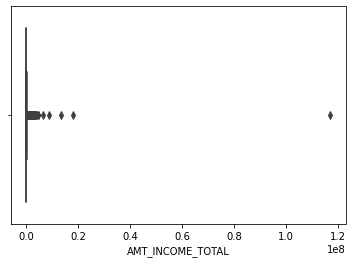

In [63]:
sns.boxplot(inp1.AMT_INCOME_TOTAL)

In [64]:
## An outlier is found in the distribution
inp1.AMT_INCOME_TOTAL.describe()

count    3.074990e+05
mean     1.687972e+05
std      2.371274e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.469970e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
inp1.AMT_INCOME_TOTAL.sort_values(ascending = False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
240137        26100.0
186643        26100.0
246104        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307499, dtype: float64

In [66]:
## Let just drop this particular value and check the plot again
inp1.drop(labels = 12840, axis = 0, inplace = True)

In [67]:
inp1.AMT_INCOME_TOTAL.describe()

count    3.074980e+05
mean     1.684173e+05
std      1.088130e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.469048e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [68]:
inp1.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    146904.75
0.70    180000.00
0.90    270000.00
0.95    337500.00
0.99    472500.00
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

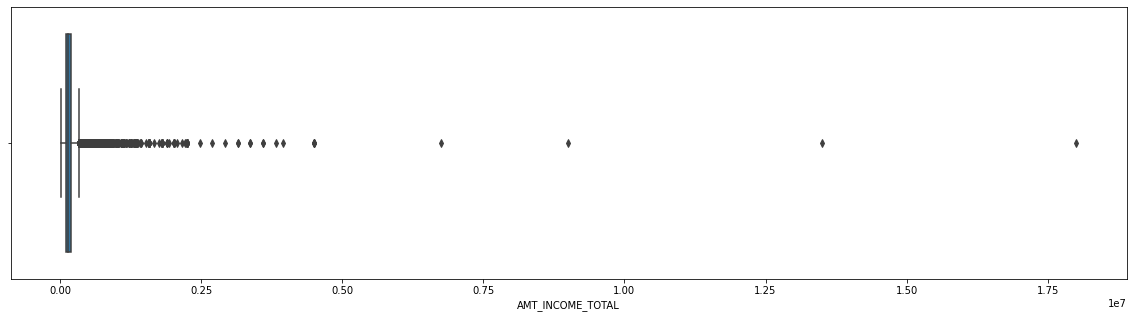

In [69]:
plt.figure(figsize = [20,5])
sns.boxplot(inp1.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

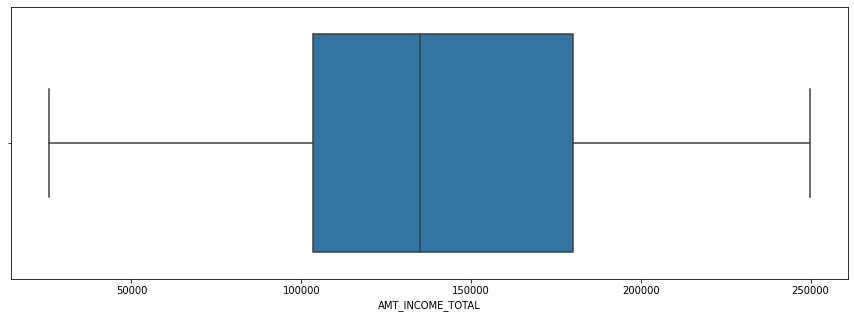

In [70]:
plt.figure(figsize = [15,5])
sns.boxplot(inp1.AMT_INCOME_TOTAL[inp1.AMT_INCOME_TOTAL<=250000])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

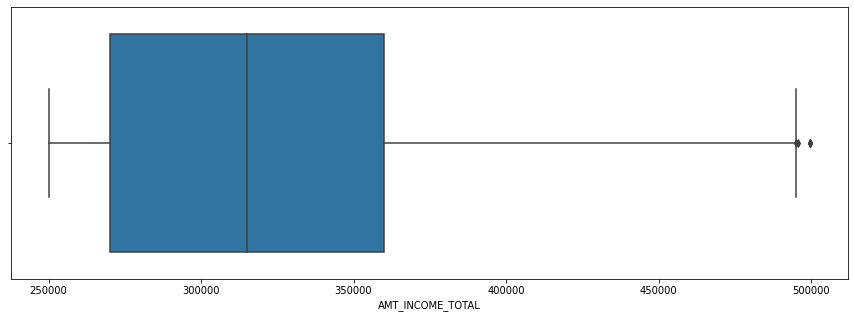

In [71]:
plt.figure(figsize = [15,5])
sns.boxplot(inp1.AMT_INCOME_TOTAL[(inp1.AMT_INCOME_TOTAL>250000) & (inp1.AMT_INCOME_TOTAL<=500000)])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

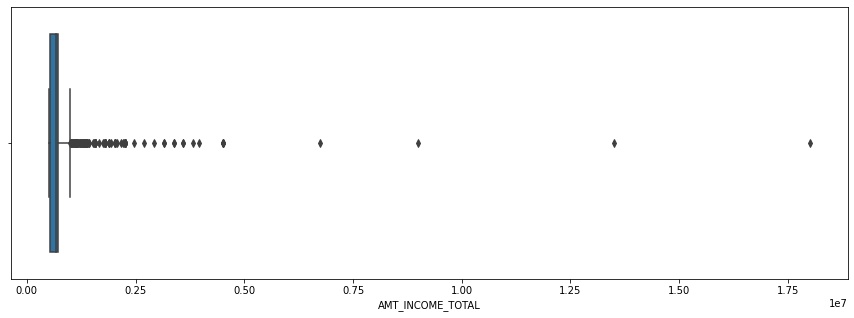

In [72]:
plt.figure(figsize = [15,5])
sns.boxplot(inp1.AMT_INCOME_TOTAL[inp1.AMT_INCOME_TOTAL>500000])

In [73]:
inp1.AMT_INCOME_TOTAL[inp1.AMT_INCOME_TOTAL>2000000].median()

2250000.0

In [74]:
pd.cut(inp1.AMT_INCOME_TOTAL, [0,250000,500000,30000000], labels = ['Low','Medium','High'])

0            Low
1         Medium
2            Low
3            Low
4            Low
           ...  
307506       Low
307507       Low
307508       Low
307509       Low
307510       Low
Name: AMT_INCOME_TOTAL, Length: 307498, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [75]:
inp1['INCOME_GROUPS'] = pd.cut(inp1.AMT_INCOME_TOTAL, [0,250000,500000,30000000], labels = ['Low','Medium','High'])

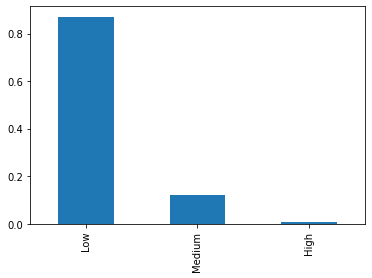

In [76]:
inp1.INCOME_GROUPS.value_counts(normalize=True).plot.bar()
plt.show()

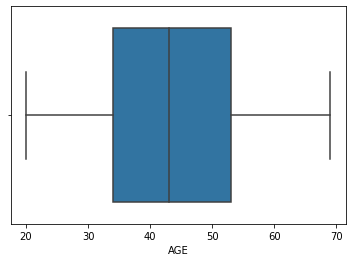

In [77]:
#Age column analysis
sns.boxplot(inp1.AGE)
plt.show()

Observation
- Age column has no outliers

In [78]:
inp1['AGE_GROUPS']= pd.cut(inp1.AGE, [0,30,40,50,60,9999], labels = ['<30', '30-40', '40-50', '50-60', '>60'])

In [79]:
inp1['AGE_GROUPS']

0           <30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506      <30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: AGE_GROUPS, Length: 307498, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '>60']

In [80]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUPS,AGE_GROUPS
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,<30
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50-60
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50-60
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50-60


Analysis of Target variable with others
--Creating two dataframes one with defaulter and other with non-defaulter

In [81]:
inp_def = inp1[inp1['TARGET'] == 1]

In [82]:
inp_nondef = inp1[inp1['TARGET'] == 0]

In [83]:
inp_def.shape

(24824, 74)

In [84]:
inp_nondef.shape

(282674, 74)

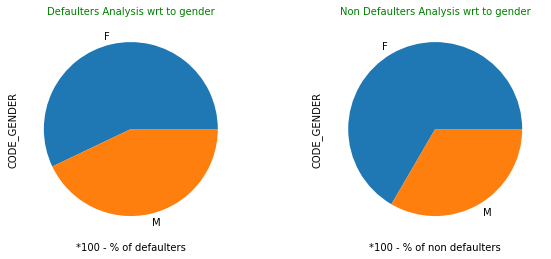

In [85]:
#univariate analysis with respect to gender
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to gender', fontdict={'fontsize':10, 'color':'green'})
inp_def.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.xlabel('*100 - % of defaulters')
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to gender',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.CODE_GENDER.value_counts(normalize = True).plot.pie()
plt.xlabel('*100 - % of non defaulters')
plt.show()


Observation:
- Female candidates are applying for the loan more.
- Both in defaulter and in non defaluter female candidates are more than male candidates.

In [86]:
inp_def.NAME_CONTRACT_TYPE.value_counts(normalize = True)

Cash loans         0.935385
Revolving loans    0.064615
Name: NAME_CONTRACT_TYPE, dtype: float64

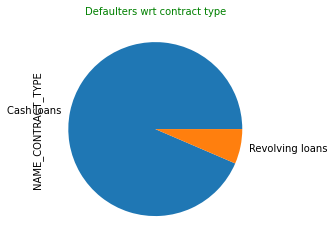

In [87]:
plt.title('Defaulters wrt contract type', fontdict={'fontsize':10, 'color':'green'})
inp_def.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.pie()
plt.show()

Observation:

Those who apply for cash loans mostly fall under defaulter category rather than revolving loans

In [88]:
##Checking income type with respect to defaulter and non-defaulter

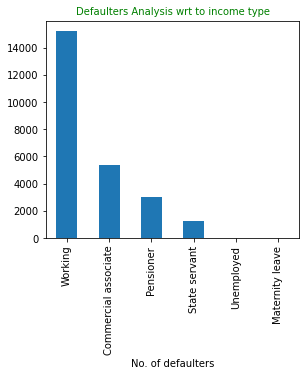

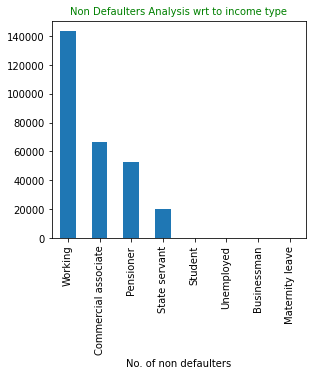

In [89]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to income type', fontdict={'fontsize':10, 'color':'green'})
inp_def.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to income type',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xlabel('No. of non defaulters')
plt.show()

Observation:
    Both in defaulter and in non-defaulter working category dominates

In [90]:
##Checking education type with respect to defaulter and non-defaulter type

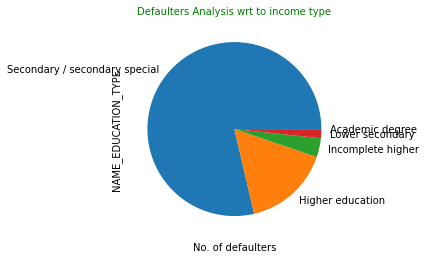

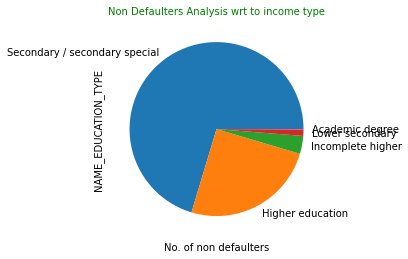

In [91]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to income type', fontdict={'fontsize':10, 'color':'green'})
inp_def.NAME_EDUCATION_TYPE.value_counts().plot.pie()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to income type',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.NAME_EDUCATION_TYPE.value_counts().plot.pie()
plt.xlabel('No. of non defaulters')
plt.show()

Observation:
    People with secondary education are more in both defaulter and non-defaulter type

##Univariate Analysis
-----##Numerical category

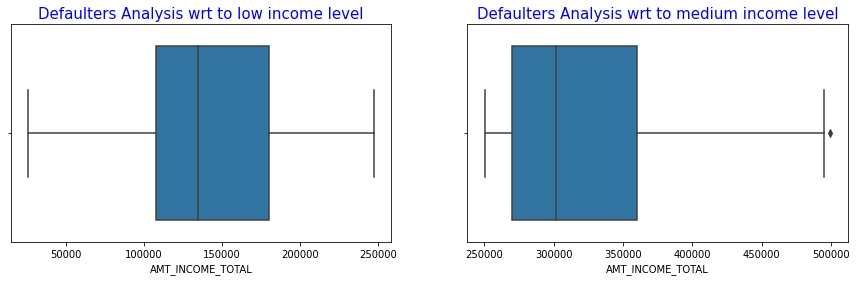

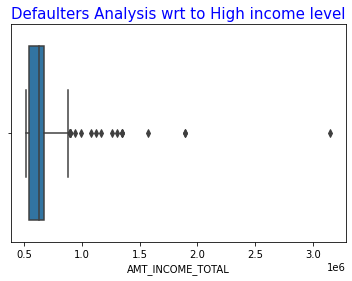

In [92]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to low income level', fontdict={'fontsize':15, 'color':'blue'})
sns.boxplot(inp_def.AMT_INCOME_TOTAL[inp_def['INCOME_GROUPS'] == 'Low'])
plt.subplot(1,2,2)
plt.title('Defaulters Analysis wrt to medium income level', fontdict={'fontsize':15, 'color':'blue'})
sns.boxplot(inp_def.AMT_INCOME_TOTAL[inp_def['INCOME_GROUPS'] == 'Medium'])
plt.show()

plt.title('Defaulters Analysis wrt to High income level', fontdict={'fontsize':15, 'color':'blue'})
sns.boxplot(inp_def.AMT_INCOME_TOTAL[inp_def['INCOME_GROUPS'] == 'High'])
plt.show()

In [93]:
inp_def.AMT_INCOME_TOTAL[inp_def['INCOME_GROUPS'] == 'Low'].describe()

count     22279.000000
mean     140281.145788
std       48916.498933
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      247500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [94]:
inp_def.AMT_INCOME_TOTAL[inp_def['INCOME_GROUPS'] == 'Medium'].describe()

count      2400.000000
mean     318990.028125
std       57426.778329
min      250200.000000
25%      270000.000000
50%      301500.000000
75%      360000.000000
max      499500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [95]:
inp_def.AMT_INCOME_TOTAL[inp_def['INCOME_GROUPS'] == 'High'].describe()

count    1.450000e+02
mean     7.131879e+05
std      3.152675e+05
min      5.175000e+05
25%      5.400000e+05
50%      6.300000e+05
75%      6.750000e+05
max      3.150000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

Observation:
- Candidates with low salary are having higher chances of loan repayment issue
- Candidates with medium salary are having higher chances of loan repayment issue
- Candidates with higher income are having lesser chances to become defaulters

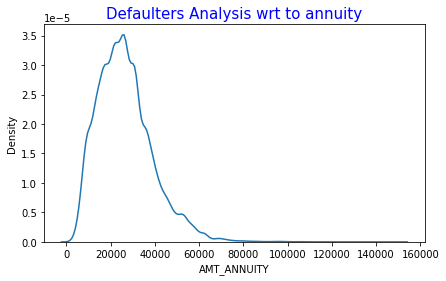

In [96]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to annuity', fontdict={'fontsize':15, 'color':'blue'})
sns.distplot(inp_def.AMT_ANNUITY, hist = None)
plt.show()

Observation:

- Higher the annuity amount lower the payment difficulties but higher annuity amount cannot be suggested for reducing defaulters in loan.

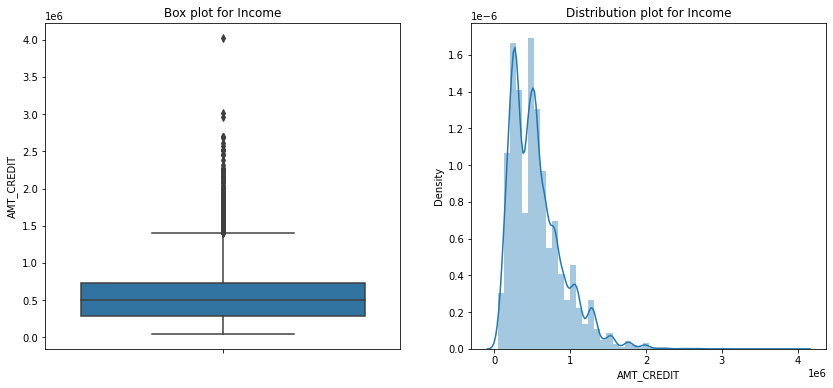

In [97]:
##plot box plot of AMT_CREDIT column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=inp_def['AMT_CREDIT'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(inp_def.AMT_CREDIT,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

Observation:

    Majority of the values lies between 0.1 to 1

<AxesSubplot:title={'center':'Defaulters Analysis wrt to REGION_RATING_CLIENT_W_CITY'}, xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='Density'>

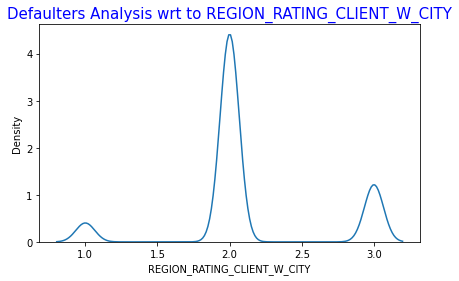

In [98]:
##REGION_RATING_CLIENT_W_CITY
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to REGION_RATING_CLIENT_W_CITY', fontdict={'fontsize':15, 'color':'blue'})
sns.distplot(inp_def.REGION_RATING_CLIENT_W_CITY, hist = None)




Observation
- Region of city with higher defaulters is ranging between city rating 2 to 2.5

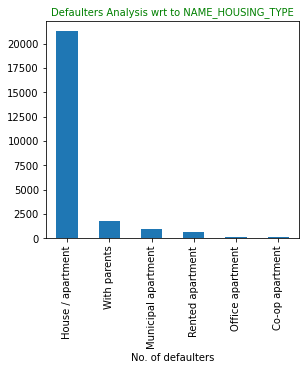

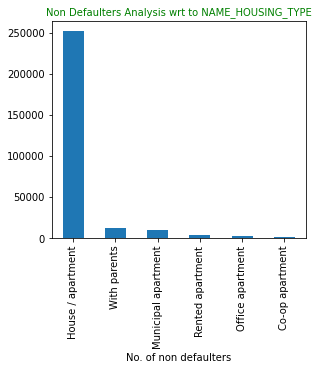

In [99]:


##NAME_HOUSING_TYPE 
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to NAME_HOUSING_TYPE', fontdict={'fontsize':10, 'color':'green'})
inp_def.NAME_HOUSING_TYPE.value_counts().plot.bar()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to NAME_HOUSING_TYPE',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.NAME_HOUSING_TYPE.value_counts().plot.bar()
plt.xlabel('No. of non defaulters')
plt.show()




Observation

Majority of the clients who resides in House/Apartments fall under defauler category.

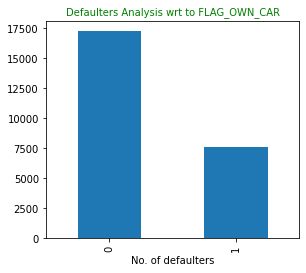

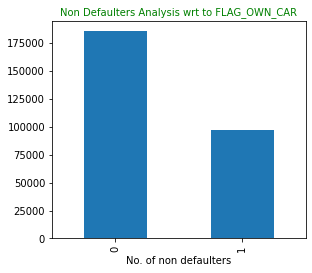

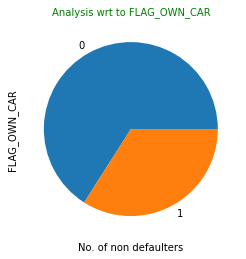

In [100]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to FLAG_OWN_CAR', fontdict={'fontsize':10, 'color':'green'})
inp_def.FLAG_OWN_CAR.value_counts().plot.bar()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to FLAG_OWN_CAR',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.FLAG_OWN_CAR.value_counts().plot.bar()
plt.xlabel('No. of non defaulters')
plt.show()
#plt.subplot(1,2,3)
plt.title('Analysis wrt to FLAG_OWN_CAR',fontdict={'fontsize':10, 'color':'green'})
inp1.FLAG_OWN_CAR.value_counts().plot.pie()
plt.xlabel('No. of non defaulters')
plt.show()

Observation

 The person who owns car repays loan on time and hence they are non-defaulter compared to the persons who doesnt own car.
 
 Majority of the defaulters are the ones who doesnot own a car.

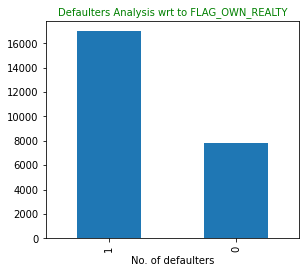

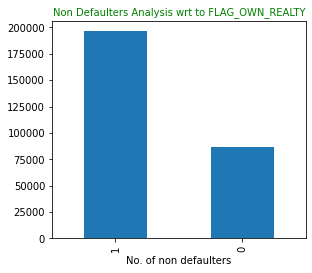

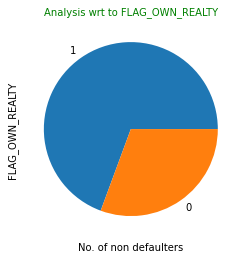

In [101]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to FLAG_OWN_REALTY', fontdict={'fontsize':10, 'color':'green'})
inp_def.FLAG_OWN_REALTY.value_counts().plot.bar()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to FLAG_OWN_REALTY',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.FLAG_OWN_REALTY.value_counts().plot.bar()
plt.xlabel('No. of non defaulters')
plt.show()
#plt.subplot(1,2,3)
plt.title('Analysis wrt to FLAG_OWN_REALTY',fontdict={'fontsize':10, 'color':'green'})
inp1.FLAG_OWN_REALTY.value_counts().plot.pie()
plt.xlabel('No. of non defaulters')
plt.show()

Observation

--People with own house forms the majority of defaulters.


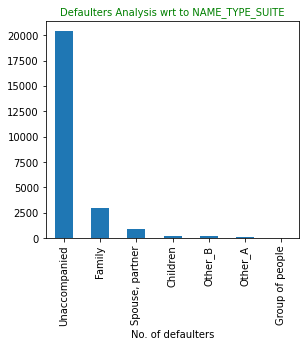

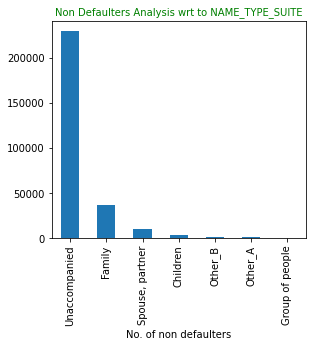

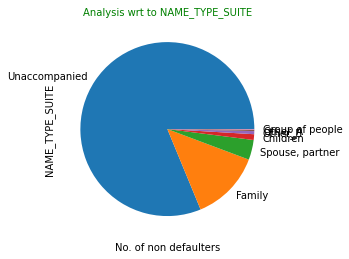

In [102]:
####NAME_TYPE_SUITE

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to NAME_TYPE_SUITE', fontdict={'fontsize':10, 'color':'green'})
inp_def.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to NAME_TYPE_SUITE',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.xlabel('No. of non defaulters')
plt.show()
#plt.subplot(1,2,3)
plt.title('Analysis wrt to NAME_TYPE_SUITE',fontdict={'fontsize':10, 'color':'green'})
inp1.NAME_TYPE_SUITE.value_counts().plot.pie()
plt.xlabel('No. of non defaulters')
plt.show()

Observation

--There appears to be not much difference in the proportion of both the sets


-Limited impacts of NAME_TYPE_SUITE


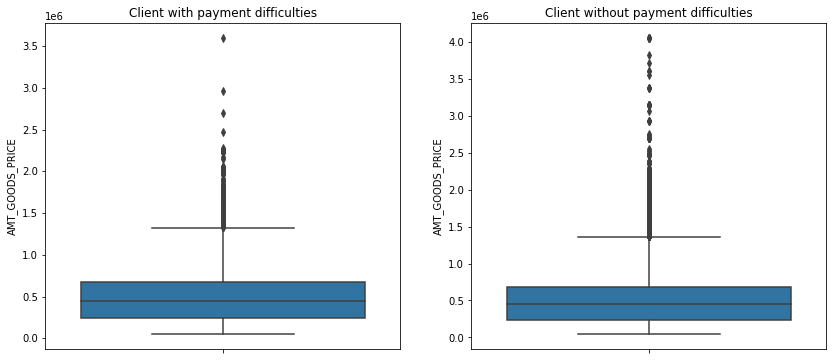

In [103]:
###plot graph for AMT_GOODS_PRICE column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=inp_def['AMT_GOODS_PRICE'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=inp_nondef['AMT_GOODS_PRICE'])
plt.title('Client without payment difficulties')
plt.show()

Observation:

     Not much of difference for both the clients with or without payment difficulties.
     
     Hence not able to identify any pattern.

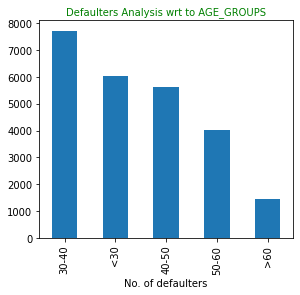

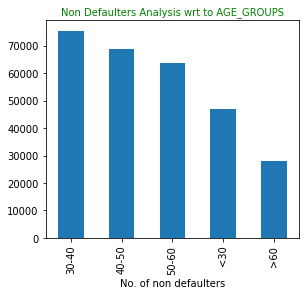

In [104]:
#wrt to AGE_GROUPS
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Defaulters Analysis wrt to AGE_GROUPS', fontdict={'fontsize':10, 'color':'green'})
inp_def.AGE_GROUPS.value_counts().plot.bar()
plt.xlabel('No. of defaulters')
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
plt.title('Non Defaulters Analysis wrt to AGE_GROUPS',fontdict={'fontsize':10, 'color':'green'})
inp_nondef.AGE_GROUPS.value_counts().plot.bar()
plt.xlabel('No. of non defaulters')
plt.show()


Observation:
    
    Clients in the age group 30-40 are facing payment difficulties while clients with the age >60 are less as a defaulters.
    
    But again giving loans to senior citizen is not advisible consider their age and income since most of the clients are       retired at this age.

Bivariate Analysis
---

In [105]:
##

Numeric to numeric

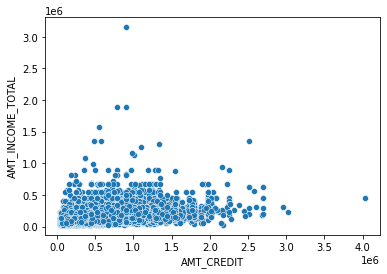

In [106]:
##AMT_CREDIT VS AMT_INCOME_TOTAL
sns.scatterplot(inp_def.AMT_CREDIT, inp_def.AMT_INCOME_TOTAL)
plt.show()

Observation


No clear Pattern can be observed between loan credited and income 

Numerical vs Categorical


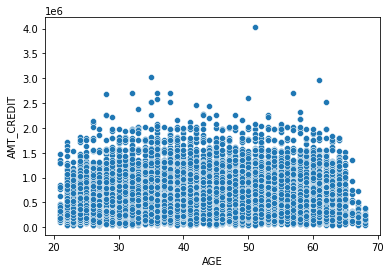

In [107]:
sns.scatterplot(inp_def.AGE,inp_def.AMT_CREDIT)
plt.show()

Observation

No clear Pattern can be observed between income and age

#### Categorical vs numerical

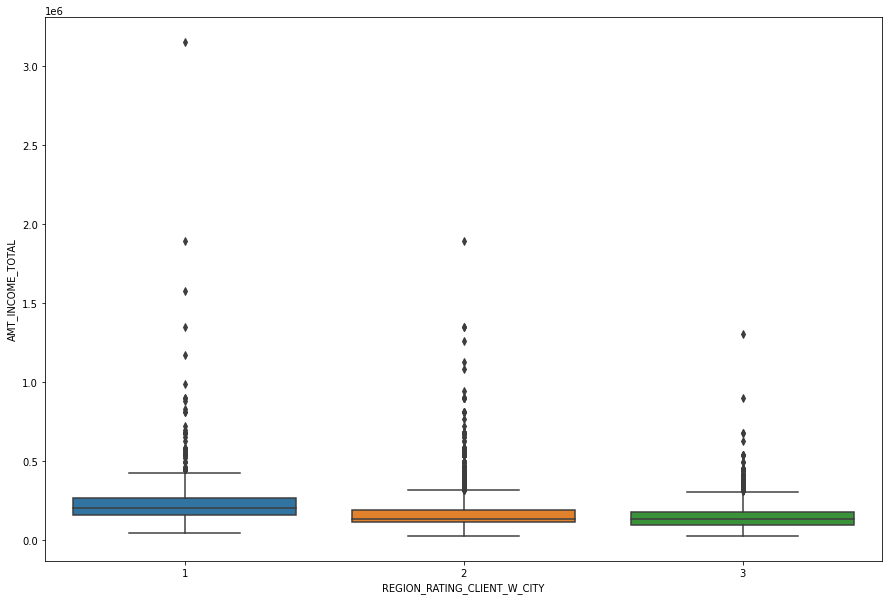

In [108]:
plt.figure(figsize=[15,10])
sns.boxplot(data = inp_def, x = 'REGION_RATING_CLIENT_W_CITY', y = 'AMT_INCOME_TOTAL')
plt.show()

Observation

----City with the rating 1 has higher defaulters comparatively with cities having rating 2 and 3, whose medians are almost the same.

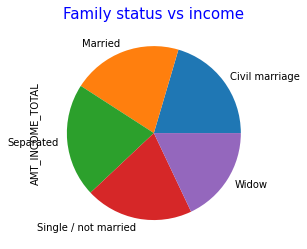

In [109]:
plt.figure(figsize=[8,4])
plt.title('Family status vs income', fontdict={'fontsize':15, 'color':'blue'})
inp_def.groupby('NAME_FAMILY_STATUS')['AMT_INCOME_TOTAL'].mean().plot.pie()
plt.show()

Observation
- From above plot we can see that a person who is separated expected to have higher salary and higher the salary lesser shall be the chances of defaulters.
- Similarly widowed are earning less and comparatively they have slightly higher chances of being defaulter than other.

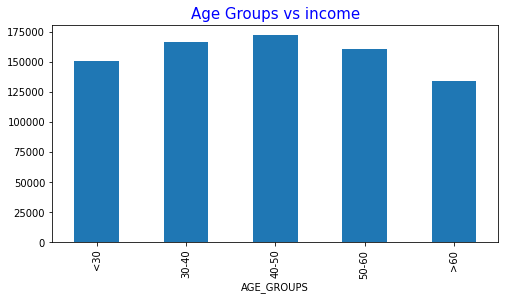

In [110]:
plt.figure(figsize=[8,4])
plt.title('Age Groups vs income', fontdict={'fontsize':15, 'color':'blue'})
inp_def.groupby('AGE_GROUPS')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.show()

Observation

--People of age between 40-50 are having higher income, hence less likely to become a defaulter

--People of age greater than 60 are observed to have lesser salary and more likely to become a defaulter

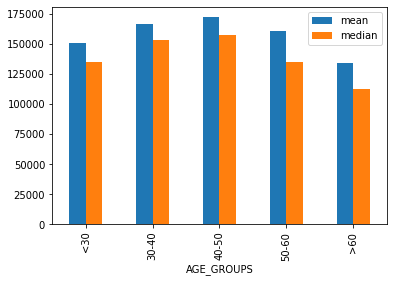

In [111]:
inp_def.groupby('AGE_GROUPS')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.show()

Observation


The age group between 40-50 are likely to fall under defaulter category.

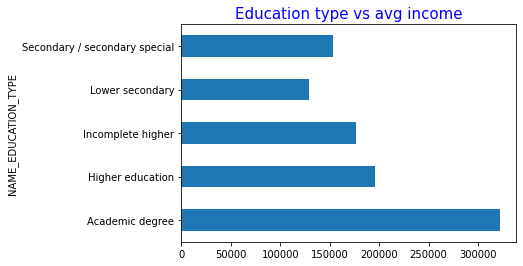

In [112]:
plt.title('Education type vs avg income', fontdict={'fontsize':15, 'color':'blue'})
inp_def.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.show()

Observations:
    
    People with higher Academic degree having high average salary has more number of defaulters when compared
    
    With the people with lower secondary education whose salry is around 1.2L fall under non-defaulter type

#### Multivariate analysis

In [113]:
defaulter1 = pd.pivot_table(data = inp1, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_FAMILY_STATUS', values = 'TARGET', aggfunc='mean')

In [114]:
defaulter1.drop('Unknown', axis = 1, inplace = True)

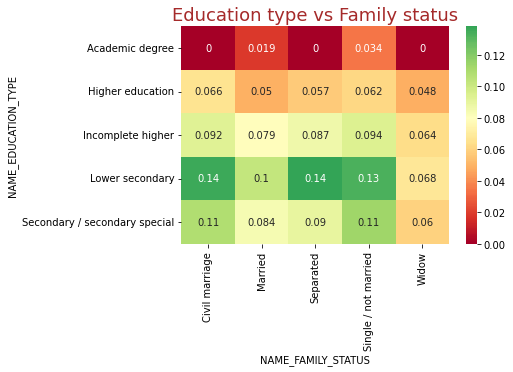

In [115]:
plt.title('Education type vs Family status', fontdict={'fontsize':18, 'color':'Brown'})
sns.heatmap(defaulter1, annot = True, cmap = 'RdYlGn', center = 0.08)
plt.show()

Observation


In this case we see that people with lower secondary education and with family status of civil marriage/separated fall under defaulter category

Pair plot


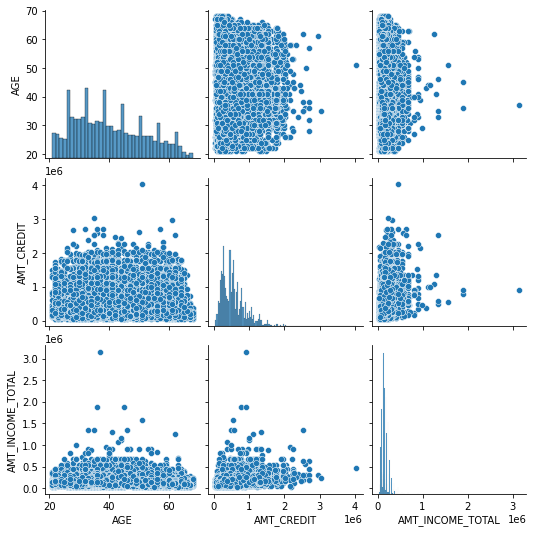

In [116]:
sns.pairplot(data = inp_def, vars = ['AGE','AMT_CREDIT','AMT_INCOME_TOTAL' ])
plt.show()

 From the above plot we cannot deduce any pattern in any of the variables

In [117]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUPS,AGE_GROUPS
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,<30
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50-60
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833,2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,50-60
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311,3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50-60


In [118]:
###XNA values are present in this column 
### remove the rows where category = XNA
inp0 = inp0[(inp0.NAME_CONTRACT_TYPE != 'XNA')]


In [119]:
##check the value counts of NAME_CONTRACT_TYPE again
inp0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [120]:
###XNA values are present in this column 
### remove the rows where category = XNA

inp0 = inp0[(inp0.NAME_CLIENT_TYPE != 'XNA')]



In [121]:
##check the value counts of NAME_CLIENT_TYPE again

inp0.NAME_CLIENT_TYPE.value_counts()

Repeater     1230960
New           301342
Refreshed     135625
Name: NAME_CLIENT_TYPE, dtype: int64

In [122]:
##NAME_PAYMENT_TYPE column has around 18% XNA values 
## drop this column for the further analysis
inp0=inp0.drop(columns=['NAME_PAYMENT_TYPE'])


In [123]:
inp0.shape

(1667927, 36)

In [124]:
inp0.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.309201
middle        0.230957
high          0.211796
low_normal    0.192918
low_action    0.055127
Name: NAME_YIELD_GROUP, dtype: float64

In [125]:
##NAME_YIELD_GROUP column has around 30% XNA values 
## drop this column for the further analysis
inp0=inp0.drop(columns=['NAME_YIELD_GROUP'])


In [126]:
inp0.shape

(1667927, 35)

In [127]:
##observe the values of 'NAME_CASH_LOAN_PURPOSE' column
inp0.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)   

XAP                                 0.552537
XNA                                 0.405745
Repairs                             0.014239
Other                               0.009354
Urgent needs                        0.005039
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001449
Medicine                            0.001303
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000636
Buying a new car                    0.000605
Wedding / gift / holiday            0.000577
Buying a home                       0.000517
Car repairs                         0.000478
Furniture                           0.000449
Buying a holiday home / land        0.000320
Business development                0.000255
Gasification / water supply         0.000179
Buying a garage                     0.000082
Hobby     

In [128]:
##observe the values of 'CODE_REJECT_REASON' column
inp0.CODE_REJECT_REASON.value_counts(normalize=True)  

XAP       0.810122
HC        0.104863
LIMIT     0.033368
SCO       0.022457
CLIENT    0.015830
SCOFR     0.007672
XNA       0.003140
VERIF     0.002119
SYSTEM    0.000430
Name: CODE_REJECT_REASON, dtype: float64

In [129]:
##observe the values of 'NAME_GOODS_CATEGORY' column
inp0.NAME_GOODS_CATEGORY.value_counts() 

XNA                         949028
Mobile                      224550
Consumer Electronics        121499
Computers                   105693
Audio/Video                  99376
Furniture                    53612
Photo / Cinema Equipment     25011
Construction Materials       24972
Clothing and Accessories     23532
Auto Accessories              7375
Jewelry                       6277
Homewares                     5020
Medical Supplies              3842
Vehicles                      3369
Sport and Leisure             2980
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1548
Direct Sales                   442
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In above three columns percentage of XNA / XPA values is more than 50% so drop following columns

NAME_CASH_LOAN_PURPOSE

CODE_REJECT_REASON

NAME_GOODS_CATEGORY

In [130]:
##drop the above columns
drop_columns_1 =['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON','NAME_GOODS_CATEGORY']
inp0=inp0.drop(columns=drop_columns_1)
inp0.shape

(1667927, 32)

Also according to observation we can drop following columns :

WEEKDAY_APPR_PROCESS_START- On which day of the week did the client apply for the loan

HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan

NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …

NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in

CHANNEL_TYPE - Through which channel we acquired the client on the previous application

SELLERPLACE_AREA - Selling area of seller place of the previous application

NAME_SELLER_INDUSTRY - The industry of the seller

PRODUCT_COMBINATION - Detailed product combination of the previous application

In [131]:
## drop these columns
drop_columns_2 = [
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'SELLERPLACE_AREA',
    'NAME_SELLER_INDUSTRY',
    'PRODUCT_COMBINATION']
inp0=inp0.drop(columns=drop_columns_2)
inp0.shape

(1667927, 24)

In [132]:
#merging both the data frames
df_merge = pd.merge(left=inp1, right=inp0, how='left', on='SK_ID_CURR')

In [133]:
df_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUPS,AGE_GROUPS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648,2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Low,<30,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1.0,0.000000,NaN,NaN,Approved,-606.0,NaN,New,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,Y,1.0,NaN,NaN,NaN,Approved,-746.0,Unaccompanied,Repeater,12.0,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,Y,1.0,0.000000,NaN,NaN,Approved,-828.0,Family,Refreshed,6.0,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186,291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,40-50,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1.0,0.100061,NaN,NaN,Approved,-2341.0,Family,Refreshed,12.0,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260,2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912

In [134]:
df_merge.shape

(1428228, 97)

In [135]:
df_merge.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428228 entries, 0 to 1428227
Data columns (total 97 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1428228 non-null  int64   
 1   TARGET                       1428228 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1428228 non-null  object  
 3   CODE_GENDER                  1428228 non-null  object  
 4   FLAG_OWN_CAR                 1428228 non-null  int64   
 5   FLAG_OWN_REALTY              1428228 non-null  int64   
 6   CNT_CHILDREN                 1428228 non-null  int64   
 7   AMT_INCOME_TOTAL             1428228 non-null  float64 
 8   AMT_CREDIT_x                 1428228 non-null  float64 
 9   AMT_ANNUITY_x                1428228 non-null  float64 
 10  AMT_GOODS_PRICE_x            1427011 non-null  float64 
 11  NAME_TYPE_SUITE_x            1428228 non-null  object  
 12  NAME_INCOME_TYPE            

In [136]:
##create two dataframes for further analysis
df_merge_target_0=df_merge[df_merge['TARGET']==0]
df_merge_target_1=df_merge[df_merge['TARGET']==1]

In [137]:
##check shape of dataframe
df_merge_target_0.shape

(1305106, 97)

In [138]:
df_merge_target_1.shape

(123122, 97)

Distribution of 'NAME_CONTRACT_STATUS' with different Variables

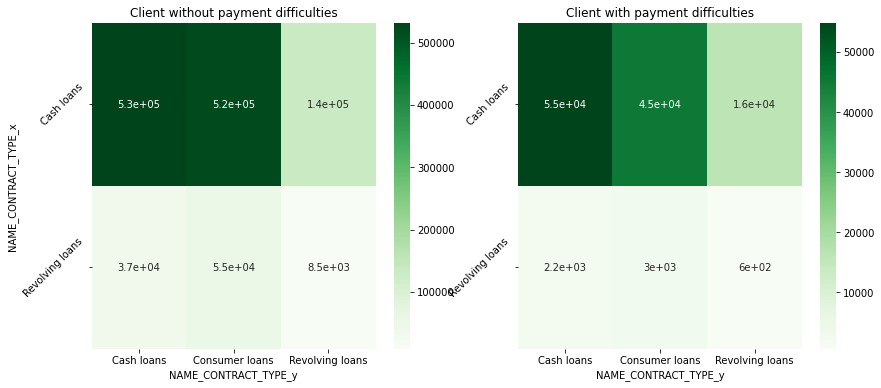

In [139]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'NAME_CONTRACT_TYPE_PREV'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
contract_type_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_TYPE_x'])['NAME_CONTRACT_TYPE_y'].value_counts().unstack()
sns.heatmap(data=contract_type_wise_contarct_type, annot=True, cmap='Greens')
plt.title('Client without payment difficulties')
plt.yticks(rotation=45)


plt.subplot(1,2,2)
contract_type_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_TYPE_x'])['NAME_CONTRACT_TYPE_y'].value_counts().unstack()
sns.heatmap(data=contract_type_wise_contarct_type, annot=True, cmap='Greens')
plt.title('Client with payment difficulties')
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

In [ ]:
#

Observation


Customers with payment difficulties have been refused to avail cash loans

Very less number of Revolving loans has been cancelled for the Clients with payment difficulities

Many clients applied for cash loans as number of Apporved cash loans is very large as compared to revoloving loans for both Clients with payment difficulities and Clients without payment difficulities

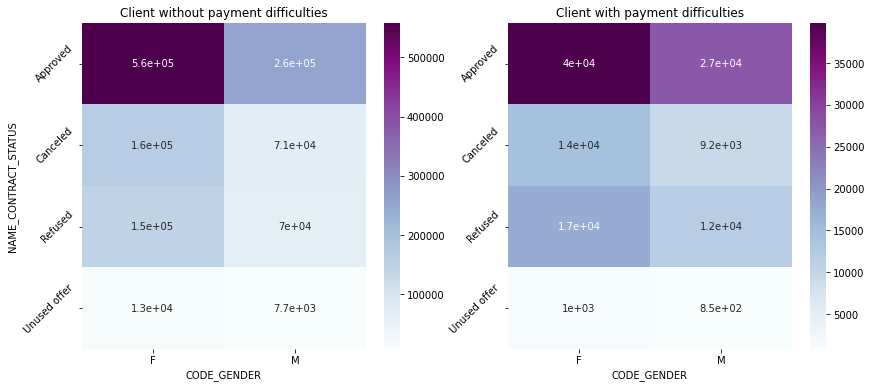

In [140]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['CODE_GENDER'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='BuPu')
plt.title('Client without payment difficulties')
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['CODE_GENDER'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='BuPu')
plt.title('Client with payment difficulties')
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

Observation

For 'Clients with payment difficulities' 

  --->Number of female clients is more who Refused loans as compared to male clients.
 
For 'Clients with payment difficulities'
  
  ---> There is very less difference between male and female clients in approved loan.

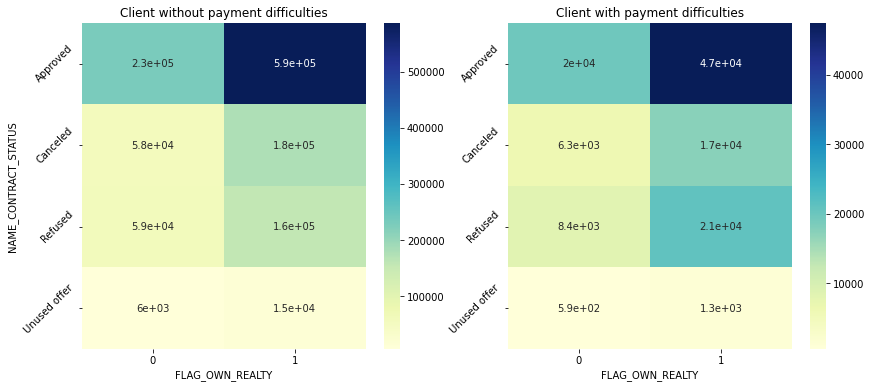

In [141]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'FLAG_OWN_REALTY'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()


Observation:
   
Number of clients are more who owns a car and refused loans than the clients who does not owns a car.

Range of Clients without payment difficulities is more then clients with payment difficulities

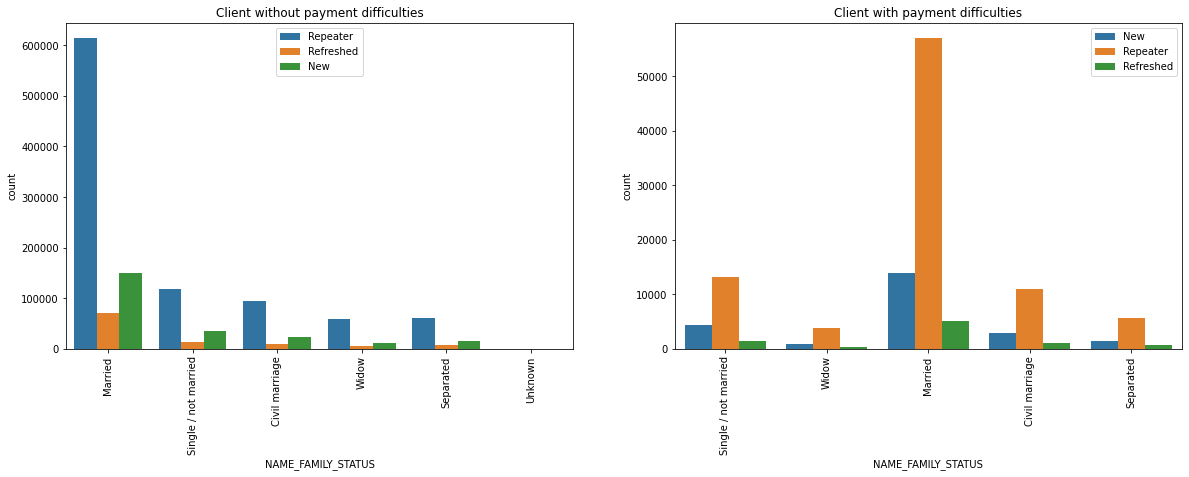

In [142]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_FAMILY_STATUS'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()


Observation

Widow Clients are lowest among all categories

Married clients are highest among the all categories

Number of New clients is more than number of Refreshed clients for clients without payment difficulities

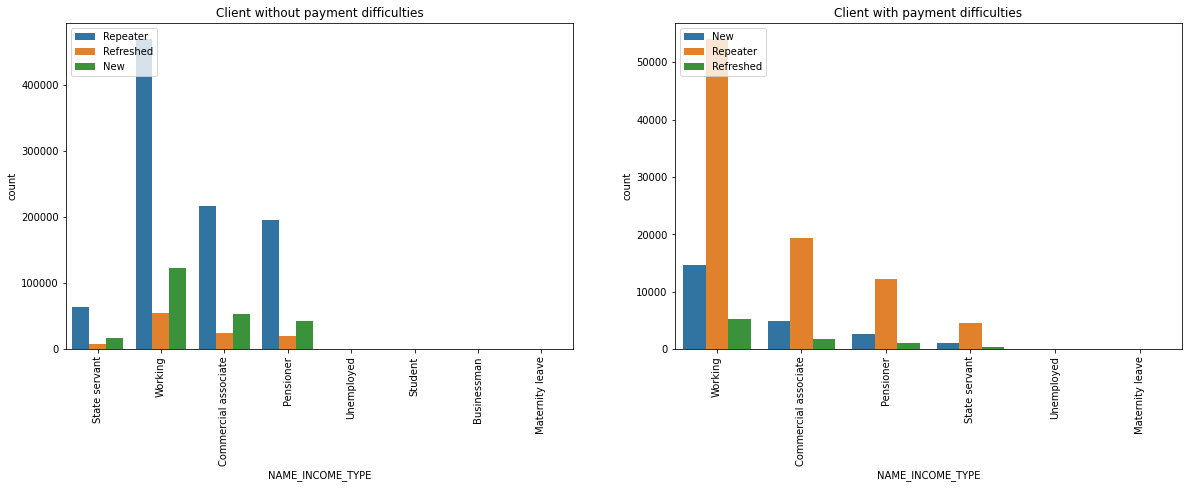

In [143]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_INCOME_TYPE'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc=2)

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc=2)

plt.show()


In [144]:
#

Observation

Working clients have the highest category in the data

Businessman, Maternity leave, Pensioner, Student clients are not opting for any type of loan

Number of Repeater clients is more than New and Refreshed clients

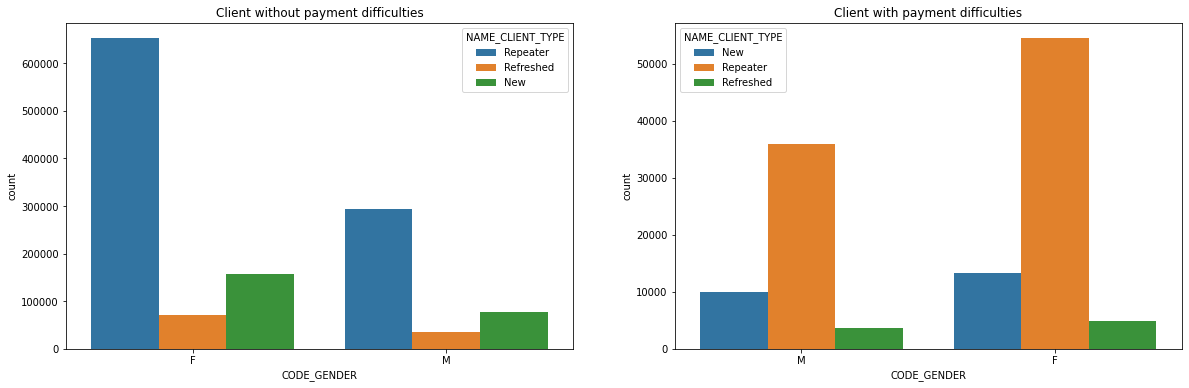

In [145]:
###Plot the graphs of Distribution of 'NAME_CLIENT_TYPE' with 'CODE_GENDER'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_target_0,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(data=df_merge_target_1,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')

plt.show()

Observation

Repeater Female clients are heights among the data for Clients without payment difficulities

Number of new clients is very less for both female and male categories in Clients without payment difficulties

In Clients with payment difficulties, number of Repeater clients is highest for both male and female category

Number of Male and Female Refreshed clients is very less for Clients with payment difficulties as comparted to New and Repeater clients

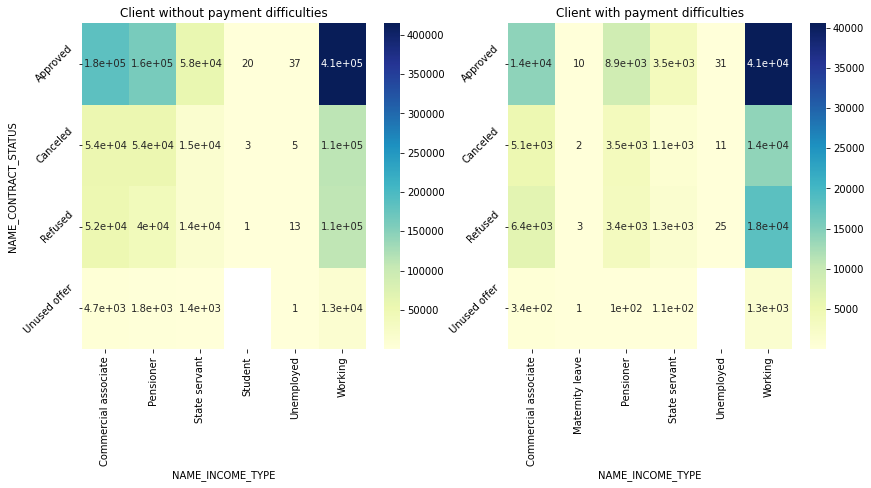

In [146]:

###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'NAME_INCOME_TYPE'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

Observation

Loan for Pensioners is never cancelled

There is no correlation between Pensioner vs unused offer , Student vs Cancelled for clients without payment difficulities

95% of student loan is apporved for clients without payment difficulities

There is no correlation between Maternity leave vs uncancelled for clients with payment difficulities

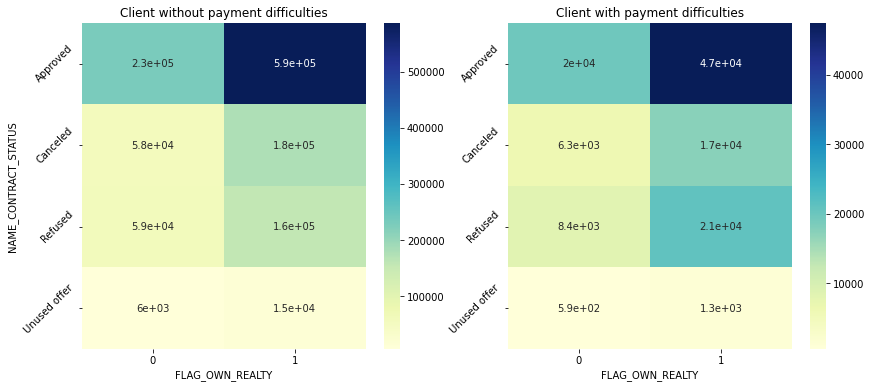

In [147]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'FLAG_OWN_REALTY'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = df_merge_target_0.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)


plt.subplot(1,2,2)
income_wise_contarct_type = df_merge_target_1.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

Observation

Number of clients who owns a car are more and has refused loans than the clients who does not own a car.

Range of Clients without payment difficulties is more then clients with payment difficulties.

CONCLUSION:
    
Clients who apply for cash loans mostly fall under defaulter category rather than revolving loans.

Candidates with higher income are having lesser chances to become defaulters.

Region of city with higher defaulters is ranging between city rating 2 to 2.5, so city rating can be considered while rendering loan.

Clients whose age is in the range 30-40 and 40-50 can be targeted for loans.

The clients who are separated are expected to have high income and higher the income lesser the chance of becoming defaulter.

The clients with previously approved loans are having more no of difficulties.
